# maxlikespy Tutorial
This will be a simple example that runs through the steps required to fit two models and run a likelihood ratio test.

The models in question are a gaussian firing field model:
$$p(t;\Theta) = a_0 + a_1T(t; \sigma_t, mu_t)$$
Where 
$$T(t; \sigma_t, \mu_t = \exp{-(t-\mu_t)^2/2\sigma_t^2)}$$
and a simple constant term model
$$p(t;\Theta) = a_0$$

With likelihoods
$$arg min_\Theta nLL = - \sum_{trial} \sum_t[f_t\log{(p)} + (1 - f_t)\log{(1-p)}]$$

# Setup
Using `maxlikespy` requires creating an instance of two classes: DataProcessor and Pipeline.

DataProcessor takes in:
* A path to spiking data
* The cells or cell you want to analyze
* Optionally, if all trials are all the same length you can pass the beginning and end timestamp.

Pipeline takes in:
* The same cell range
* The DataProcessor object
* A list of models you wish to fit



In [12]:
import maxlikespy.analysis as analysis


path_to_data = "/Users/stevecharczynski/workspace/data/cromer"
cell_range = range(11,13)
data_processor = analysis.DataProcessor(
    path_to_data, cell_range, window=[400,2000])
pipeline = analysis.Pipeline(cell_range, data_processor, ["Time", "Const"])



Time window provided. Assuming all trials are of equal length
spike_info not found


The next step is to set:
* Upper and lower bounds on model parameters
* Initial parameter state for the solver

In [13]:
bounds = {
    "a_1" : [10e-10, 1 / 2],
    "ut" : [0., 2400.],
    "st" : [10., 5000.],
    "a_0" : [10e-10, 1 / 2]
}
bounds_c = {"a_0": [10e-10, 0.999]}
pipeline.set_model_bounds("Time", bounds)
pipeline.set_model_bounds("Const", bounds_c)
pipeline.set_model_x0("Time", [1e-5, 400, 100, 1e-5])
pipeline.set_model_x0("Const", [1e-5])
    

The show rasters method is useful for inspecting your cells before the fitting process

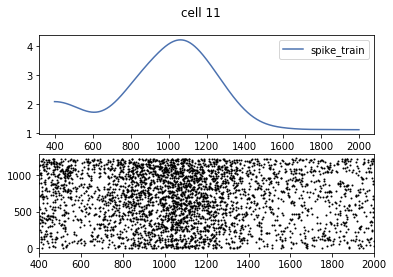

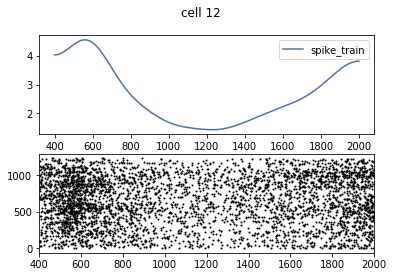

In [7]:
pipeline.show_rasters()



# Fitting Parameters

From here, all that needs to be run is `Pipeline`'s `fit_all_models` method which takes the dict of parameters as shown below. This method fits all model parameters and saves the results to disk.

In [14]:
solver_params = {
    "niter" : 1,
    "stepsize" : 1000,
    "interval" : 10,
    "method" : "TNC",
    "use_jac" : True,
    "T" : 1,
    "disp" : False
}
pipeline.fit_all_models(solver_params=solver_params)


Fitting cell 11
Fitting Time
Fitting Const
Models fit in 13.825716018676758 seconds
Fitting cell 12
Fitting Time
Fitting Const
Models fit in 21.011099815368652 seconds


# Comparing Models

Currently `maxlikespy` supports comparing nested models via a likelihood ratio test. 

The `Pipeline` method accepts the name of two valid models and a p-value to use as a threshold. The result and figure is written to disk.

Const fit is: [0.00180771]
Time fit is: [2.75264125e-03 1.04647215e+03 1.69881481e+02 1.07515796e-03]
25938.249378772038 25504.731536011248 3
p-value is: 1.2504077656540867e-187
True


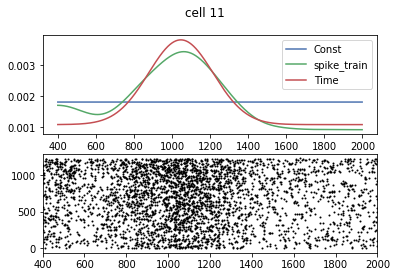

Const fit is: [0.00214621]
Time fit is: [3.00017730e-03 5.68961552e+02 8.07377287e+01 1.77352642e-03]
30071.942541177556 29820.92380214469 3
p-value is: 1.7263045244922027e-108
True


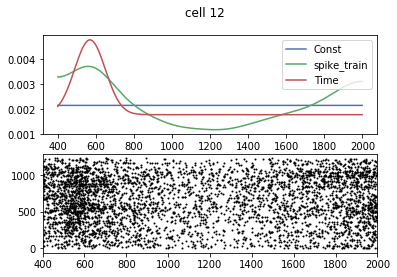

In [15]:
pipeline.compare_models("Const", "Time", 0.01)